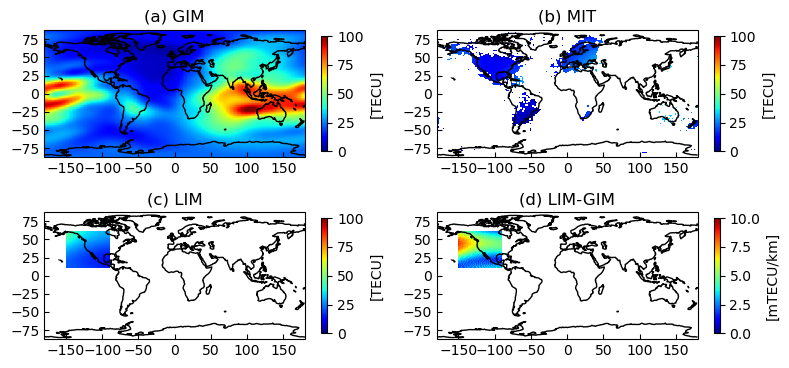

In [23]:
from mintpy.objects import ionex
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import h5py

# 读取 IONEX 文件
tec_file = '/home/eedy/data/aux/IONEX/jplg1250.23i'
mins, lat, lon, tec_maps, rms_maps = ionex.read_ionex(tec_file)

# 读取 netCDF 文件
filename_nc = '/home/eedy/data/aux/IONEX/gps230505g.001.nc'
dataset = Dataset(filename_nc, 'r')
lat_nc = dataset.variables['gdlat'][:]
lon_nc = dataset.variables['glon'][:]
tec_nc = dataset.variables['tec'][:]
dataset.close()
utc_min = np.arange(0, 24 * 60, 5)

# 读取 LIM 文件
filename_lim = '/home/eedy/data/aux/LIM/USA/2023/USA1390.h5'


def read_LIM_file(filename):
    with h5py.File(filename, 'r') as f:
        tec_maps = f['GIM_all'][:]

    # 交换维度顺序，从 (lons, lats, mins) 变为 (mins, lats, lons)
    tec_maps = np.transpose(tec_maps, (2, 1, 0))

    # 定义经纬度和时间间隔
    lon = np.arange(-150, -90 + 1, 1)
    lat = np.arange(10, 60 + 1, 1)
    mins = np.arange(0, 1440 + 60, 60)

    return lat, lon, tec_maps, mins


lat_lim, lon_lim, tec_maps_lim, mins_lim = read_LIM_file(filename_lim)


def read_LIM_file_gix(filename):
    with h5py.File(filename, 'r') as f:
        tec_maps = f['GIX_all'][:]

    # 交换维度顺序，从 (lons, lats, mins) 变为 (mins, lats, lons)
    tec_maps = np.transpose(tec_maps, (2, 1, 0))

    # 定义经纬度和时间间隔
    lon = np.arange(-150, -90 + 1, 1)
    lat = np.arange(10, 60 + 1, 1)
    mins = np.arange(0, 1440 + 60, 60)

    return lat, lon, tec_maps, mins


lat_lim_gix, lon_lim_gix, tec_maps_lim_gix, mins_lim_gix = read_LIM_file_gix(filename_lim)

# 创建 2x2 的子图布局
fig, axes = plt.subplots(2, 2, figsize=(8, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制第一个图（GIM）
im1 = axes[0, 0].imshow(tec_maps[3, :, :], cmap='jet', origin='lower',
                        extent=[lon.min(), lon.max(), lat.min(), lat.max()],
                        transform=ccrs.PlateCarree(), vmax=100, vmin=0)
axes[0, 0].add_feature(cfeature.COASTLINE)
axes[0, 0].tick_params(axis='both', direction='in')
axes[0, 0].set_xticks(np.arange(-150, 151, 50))
axes[0, 0].set_yticks(np.arange(-75, 76, 25))
fig.colorbar(im1, ax=axes[0, 0], label='[TECU]', shrink=0.4)
axes[0, 0].set_title('(a) GIM')

# 获取第一个子图的图像尺寸
xlims = axes[0, 0].get_xlim()
ylims = axes[0, 0].get_ylim()

# 绘制第二个图（MIT）
im2 = axes[0, 1].imshow(tec_nc[72, :, :], cmap='jet', origin='lower',
                        extent=[lon_nc.min(), lon_nc.max(), lat_nc.min(), lat_nc.max()],
                        transform=ccrs.PlateCarree(), vmax=100, vmin=0)
axes[0, 1].add_feature(cfeature.COASTLINE)
axes[0, 1].tick_params(axis='both', direction='in')
axes[0, 1].set_xticks(np.arange(-150, 151, 50))
axes[0, 1].set_yticks(np.arange(-75, 76, 25))
axes[0, 1].set_xlim(xlims)
axes[0, 1].set_ylim(ylims)
fig.colorbar(im2, ax=axes[0, 1], label='[TECU]', shrink=0.4)
axes[0, 1].set_title('(b) MIT')

# 绘制第三个图（LIM）
im3 = axes[1, 0].imshow(tec_maps_lim[6, :, :], cmap='jet', origin='lower',
                        extent=[lon_lim.min(), lon_lim.max(), lat_lim.min(), lat_lim.max()],
                        transform=ccrs.PlateCarree(), vmax=100, vmin=0)
axes[1, 0].add_feature(cfeature.COASTLINE)
axes[1, 0].tick_params(axis='both', direction='in')
axes[1, 0].set_xticks(np.arange(-150, 151, 50))
axes[1, 0].set_yticks(np.arange(-75, 76, 25))
axes[1, 0].set_xlim(xlims)
axes[1, 0].set_ylim(ylims)
fig.colorbar(im3, ax=axes[1, 0], label='[TECU]', shrink=0.4)
axes[1, 0].set_title('(c) LIM')

# 绘制第四个图（LIM-GIM）
im4 = axes[1, 1].imshow(tec_maps_lim_gix[6, :, :], cmap='jet', origin='lower',
                        extent=[lon_lim_gix.min(), lon_lim_gix.max(), lat_lim_gix.min(), lat_lim_gix.max()],
                        transform=ccrs.PlateCarree(), vmax=10, vmin=0)
axes[1, 1].add_feature(cfeature.COASTLINE)
axes[1, 1].tick_params(axis='both', direction='in')
axes[1, 1].set_xticks(np.arange(-150, 151, 50))
axes[1, 1].set_yticks(np.arange(-75, 76, 25))
axes[1, 1].set_xlim(xlims)
axes[1, 1].set_ylim(ylims)
fig.colorbar(im4, ax=axes[1, 1], label='[mTECU/km]', shrink=0.4)
axes[1, 1].set_title('(d) LIM-GIM')

# 调整子图间距
plt.subplots_adjust(wspace=0.1, hspace=-0.6)  # 减小水平和垂直间距
plt.tight_layout()
plt.savefig('pic/iono_map.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()